In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 112kB 5.1MB/s eta 0:00:01
Libraries imported.


In [26]:
df = pd.read_excel(r'act postcodes.xlsx')
df.head()

,districs,Suburbs,postcodes,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population
0,North Canberra,Acton,2601,149.1194,-35.2794,925,13.3
1,North Canberra,Ainslie,2602,149.1442,-35.2628,925,13.3
2,South Canberra,Barton,2600,149.1344,-35.3078,1376,6.8
3,North Canberra,Braddon,2612,149.1356,-35.2719,925,13.3
4,North Canberra,Campbell - Duntroon,2612,149.1617,-35.3032,925,13.3


In [27]:
address = 'Canberra, ACT'

geolocator = Nominatim(user_agent="Canberra_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Canberra are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Canberra are -35.2975906, 149.1012676.


In [4]:
# create map of Canberra using latitude and longitude values
map_canberra = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['districs'], df['Suburbs']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_canberra)  
    
map_canberra

In [5]:
CLIENT_ID = 'HJ2CYGT1M0FJILE1JZCCPCHTSC44N3L0E12CGVRIJ5MV4YAG' # your Foursquare ID
CLIENT_SECRET = 'KPV44XIEL2T340TNIDMMLPMLESLEGTCZRBODHGW2HYLNAAHE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HJ2CYGT1M0FJILE1JZCCPCHTSC44N3L0E12CGVRIJ5MV4YAG
CLIENT_SECRET:KPV44XIEL2T340TNIDMMLPMLESLEGTCZRBODHGW2HYLNAAHE


In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
LIMIT = 200
venues = getNearbyVenues(names=df['Suburbs'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Acton 
Ainslie 
Barton 
Braddon 
Campbell - Duntroon 
Capital Hill 
City (also referred to as Civic) 
Deakin 
Dickson - Dickson Centre 
Downer 
Forrest 
Fyshwick 
Griffith - Manuka 
Hackett
Kingston - The Causeway
Lyneham - North Lyneham 
Narrabundah 
O'Connor 
Parkes 
Red Hill 
Reid 
Russell
Turner 
Watson
Yarralumla
Aranda 
Belconnen - Belconnen Town Centre - Emu Ridge
Bruce 
Charnwood 
Cook 
Dunlop
Evatt
Florey 
Flynn 
Fraser 
Giralang 
Hawker 
Higgins 
Holt - Kippax Centre
Kaleen
Latham 
Lawson 
Macgregor 
Macnamara 
Macquarie - Jamison Centre 
McKellar
Melba 
Page
Scullin 
Spence 
Weetangera 
Amaroo 
Bonner 
Casey 
Crace 
Forde 
Franklin
Gungahlin - Gungahlin Town Centre 
Harrison 
Jacka 
Mitchell
Moncrieff
Ngunnawal 
Nicholls 
Palmerston 
Taylor 
Throsby 
Beard
Hume
Oaks Estate 
Symonston
Canberra Airport
Pialligo 
Denman Prospect
Coombs
Wright
Banks 
Bonython 
Calwell 
Chisholm 
Conder
Fadden 
Gilmore 
Gordon 
Gowrie
Greenway - Tuggeranong Town Centre 
Isabella Plains
Kambah - K

In [8]:
print(venues.shape)
venues.head()

(3438, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acton,-35.2794,149.1194,Llewellyn Hall,-35.280604,149.123442,Concert Hall
1,Acton,-35.2794,149.1194,Group Seven Espresso,-35.281864,149.124639,Coffee Shop
2,Acton,-35.2794,149.1194,The Cupping Room,-35.280472,149.126106,Coffee Shop
3,Acton,-35.2794,149.1194,Harvest,-35.278223,149.126675,Coffee Shop
4,Acton,-35.2794,149.1194,Two Before Ten,-35.279753,149.126229,Café


In [9]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acton,97,97,97,97,97,97
Ainslie,90,90,90,90,90,90
Amaroo,36,36,36,36,36,36
Aranda,33,33,33,33,33,33
Banks,5,5,5,5,5,5
Barton,96,96,96,96,96,96
Beard,8,8,8,8,8,8
Belconnen - Belconnen Town Centre - Emu Ridge,1,1,1,1,1,1
Bonner,11,11,11,11,11,11


In [10]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 199 uniques categories.


In [11]:
# one hot encoding
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Neighborhood,Airport,Airport Lounge,Animal Shelter,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,Baby Store,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach,Beer Bar,Bike Trail,Bistro,Bookstore,Border Crossing,Botanical Garden,Bowling Alley,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Campground,Cantonese Restaurant,Child Care Service,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Costume Shop,Creperie,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Hockey Arena,Home Service,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Lake,Lebanese Restaurant,Library,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Memorial Site,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Motorsports Shop,Mountain,Multiplex,Museum,Music Venue,Nature Preserve,Newsstand,Noodle House,North Indian Restaurant,Organic Grocery,Outdoor Sculpture,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Post Office,Pub,Public Art,RV Park,Racecourse,Record Shop,Restaurant,River,Rugby Pitch,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Shipping Store,Shopping Mall,Shopping Plaza,Skating Rink,Soccer Field,Social Club,South Indian Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Winery,Yoga Studio,Zoo
0,Acton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Acton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Acton,0,0,0,0,0,0,0

In [12]:
venues_onehot.shape

(3438, 200)

In [13]:
venues_grouped = venues_onehot.groupby('Neighborhood').sum().reset_index()
venues_grouped

,Neighborhood,Airport,Airport Lounge,Animal Shelter,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,Baby Store,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach,Beer Bar,Bike Trail,Bistro,Bookstore,Border Crossing,Botanical Garden,Bowling Alley,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Campground,Cantonese Restaurant,Child Care Service,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Costume Shop,Creperie,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Hockey Arena,Home Service,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Lake,Lebanese Restaurant,Library,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Memorial Site,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Motorsports Shop,Mountain,Multiplex,Museum,Music Venue,Nature Preserve,Newsstand,Noodle House,North Indian Restaurant,Organic Grocery,Outdoor Sculpture,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Post Office,Pub,Public Art,RV Park,Racecourse,Record Shop,Restaurant,River,Rugby Pitch,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Shipping Store,Shopping Mall,Shopping Plaza,Skating Rink,Soccer Field,Social Club,South Indian Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Winery,Yoga Studio,Zoo
0,Acton,0,0,0,0,0,2,0,2,0,0,1,0,3,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,14,0,0,0,1,1,0,0,1,9,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,4,1,0,1,1,0,0,0,3,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,2,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,2,0,0,0
1,Ainslie,0,0,0,0,0,3,0,2,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,0,1,0,11,0,0,0,3,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,7,0,0,1,1,0,0,0,2,0,0,1,0,0,0,3,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,2,1,0,0,1,0,0,0,0,0,0,1,1,2,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,2,0,0,0,0,1,1,0,0,0,0,0,2,0,0,1,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0
2,Amaroo,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Aranda,0,0,0,0

In [14]:
num_top_venues = 10

for hood in venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acton ----
                   venue  freq
0                   Café  14.0
1            Coffee Shop   9.0
2                   Park   4.0
3                  Hotel   4.0
4     Italian Restaurant   3.0
5                    Bar   3.0
6           Burger Joint   2.0
7               Wine Bar   2.0
8       Asian Restaurant   2.0
9  Australian Restaurant   2.0


----Ainslie ----
                   venue  freq
0                   Café  11.0
1                  Hotel   7.0
2     Chinese Restaurant   3.0
3                    Bar   3.0
4           Liquor Store   3.0
5  Vietnamese Restaurant   3.0
6            Coffee Shop   3.0
7       Asian Restaurant   3.0
8  Australian Restaurant   2.0
9              Newsstand   2.0


----Amaroo ----
                  venue  freq
0           Supermarket   4.0
1                  Café   4.0
2  Fast Food Restaurant   2.0
3         Grocery Store   2.0
4        Shopping Plaza   2.0
5      Asian Restaurant   1.0
6         Shopping Mall   1.0
7     Convenience Store   

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [16]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_sorted.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton,Café,Coffee Shop,Park,Hotel,Italian Restaurant,Bar,Wine Bar,Restaurant,Burger Joint,History Museum
1,Ainslie,Café,Hotel,Coffee Shop,Bar,Chinese Restaurant,Asian Restaurant,Liquor Store,Vietnamese Restaurant,Social Club,Pizza Place
2,Amaroo,Café,Supermarket,Grocery Store,Shopping Plaza,Fast Food Restaurant,Convenience Store,Persian Restaurant,Business Service,Shopping Mall,Sandwich Place
3,Aranda,Gym,Café,Pharmacy,Liquor Store,Supermarket,Bar,Pet Store,Donut Shop,Mexican Restaurant,Burger Joint
4,Banks,Garden,Park,Playground,Hill,Electronics Store,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant


In [17]:
venues_grouped.columns.values.tolist()

['Neighborhood',
 'Airport',
 'Airport Lounge',
 'Animal Shelter',
 'Art Gallery',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Australian Restaurant',
 'Auto Workshop',
 'Baby Store',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Stadium',
 'Beach',
 'Beer Bar',
 'Bike Trail',
 'Bistro',
 'Bookstore',
 'Border Crossing',
 'Botanical Garden',
 'Bowling Alley',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Buffet',
 'Building',
 'Burger Joint',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Cafeteria',
 'Café',
 'Campground',
 'Cantonese Restaurant',
 'Child Care Service',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Comic Shop',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Costume Shop',
 'Creperie',
 'Cricket Ground',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Dim Sum Restaurant',
 'Discount Store',
 'Doner Restaurant

In [18]:

total_restaurants = venues_grouped['Vietnamese Restaurant']+venues_grouped['Vegetarian / Vegan Restaurant']+\
venues_grouped['Turkish Restaurant']+venues_grouped['Thai Restaurant']+venues_grouped['Tapas Restaurant']+\
venues_grouped['Szechuan Restaurant']+venues_grouped['Sushi Restaurant']+venues_grouped['Steakhouse']+\
venues_grouped['Lebanese Restaurant']+venues_grouped['Sandwich Place']+\
venues_grouped['Restaurant']+venues_grouped['Pizza Place']+venues_grouped['Persian Restaurant']+\
venues_grouped['North Indian Restaurant']+venues_grouped['Noodle House']+venues_grouped['Molecular Gastronomy Restaurant']+\
venues_grouped['Mexican Restaurant']+venues_grouped['Mediterranean Restaurant']+venues_grouped['Malay Restaurant']+\
venues_grouped['Korean Restaurant']+venues_grouped['Japanese Restaurant']+venues_grouped['Italian Restaurant']+\
venues_grouped['Indian Restaurant']+venues_grouped['Hot Dog Joint']+venues_grouped['Fried Chicken Joint']+\
venues_grouped['French Restaurant']+venues_grouped['Food Truck']+venues_grouped['Food Court']+\
venues_grouped['Food & Drink Shop']+venues_grouped['Fish & Chips Shop']+venues_grouped['Fast Food Restaurant']+\
venues_grouped['Ethiopian Restaurant']+venues_grouped['Dumpling Restaurant']+venues_grouped['Gastropub']+\
venues_grouped['Dim Sum Restaurant']+venues_grouped['Chinese Restaurant']+venues_grouped['Cantonese Restaurant']+\
venues_grouped['Australian Restaurant']+venues_grouped['Burger Joint']+venues_grouped['Buffet']+\
venues_grouped['Asian Restaurant']+venues_grouped['Middle Eastern Restaurant']+venues_grouped['Salad Place'] 

In [19]:
df_restaurants = pd.DataFrame(data={'Neighborhood': venues_grouped['Neighborhood'],'Total Restaurants':total_restaurants})

In [20]:
df_restaurants.head(10)

,Neighborhood,Total Restaurants
0,Acton,25
1,Ainslie,32
2,Amaroo,10
3,Aranda,5
4,Banks,0
5,Barton,24
6,Beard,1
7,Belconnen - Belconnen Town Centre - Emu Ridge,1
8,Bonner,3
9,Bonython,1


In [21]:
df_restaurants.rename(columns={'Neighborhood': 'Suburbs'}, inplace=True)

In [23]:
df_restaurants.head()

,Suburbs,Total Restaurants
0,Acton,25
1,Ainslie,32
2,Amaroo,10
3,Aranda,5
4,Banks,0


In [79]:
# Create the final data frame that will be analyzed using clustering
df_final = pd.merge(df,df_restaurants,on='Suburbs')
column_names = ["postcodes","districs","Suburbs","Longitude","Latitude","Median weekly personal income(A$)","Percentage of the ACT population","Total Restaurants"]
df_final = df_final.reindex(columns=column_names)
df_final.head()

,postcodes,districs,Suburbs,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
0,2601,North Canberra,Acton,149.1194,-35.2794,925,13.3,25
1,2602,North Canberra,Ainslie,149.1442,-35.2628,925,13.3,32
2,2600,South Canberra,Barton,149.1344,-35.3078,1376,6.8,24
3,2612,North Canberra,Braddon,149.1356,-35.2719,925,13.3,26
4,2612,North Canberra,Campbell - Duntroon,149.1617,-35.3032,925,13.3,11


In [80]:
#Drop columns that wont be used for clustering
df_final1=df_final.drop(['postcodes','districs','Latitude','Longitude'],axis=1)

In [81]:
df_final1.head()

,Suburbs,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
0,Acton,925,13.3,25
1,Ainslie,925,13.3,32
2,Barton,1376,6.8,24
3,Braddon,925,13.3,26
4,Campbell - Duntroon,925,13.3,11


In [82]:
# set number of clusters
kclusters = 5

grouped_clustering = df_final1.drop('Suburbs', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 1, 3, 3, 1, 3, 1, 3, 3], dtype=int32)

In [83]:
# add clustering labels
df_final1.insert(0, 'Cluster Labels', kmeans.labels_)

In [84]:
venues_merged = df_final.loc[:,'postcodes':'Latitude']
venues_merged.head()

,postcodes,districs,Suburbs,Longitude,Latitude
0,2601,North Canberra,Acton,149.1194,-35.2794
1,2602,North Canberra,Ainslie,149.1442,-35.2628
2,2600,South Canberra,Barton,149.1344,-35.3078
3,2612,North Canberra,Braddon,149.1356,-35.2719
4,2612,North Canberra,Campbell - Duntroon,149.1617,-35.3032


In [85]:
# merge canberra_grouped with canberra_data to add latitude/longitude for each suburbs
venues_merged = venues_merged.join(df_final1.set_index('Suburbs'), on='Suburbs')
venues_merged.head()

,postcodes,districs,Suburbs,Longitude,Latitude,Cluster Labels,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
0,2601,North Canberra,Acton,149.1194,-35.2794,3,925,13.3,25
1,2602,North Canberra,Ainslie,149.1442,-35.2628,3,925,13.3,32
2,2600,South Canberra,Barton,149.1344,-35.3078,1,1376,6.8,24
3,2612,North Canberra,Braddon,149.1356,-35.2719,3,925,13.3,26
4,2612,North Canberra,Campbell - Duntroon,149.1617,-35.3032,3,925,13.3,11


In [86]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,sp in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Suburbs'], venues_merged['Cluster Labels'],venues_merged['Total Restaurants'],venues_merged["Median weekly personal income(A$)"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) +'\nMedian weekley incomeA$: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [87]:
#cluster 1
venues_merged.loc[venues_merged['Cluster Labels'] == 0, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,districs,Suburbs,Longitude,Latitude,Cluster Labels,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
65,Jerrabomberra,Beard,149.2100,-35.3413,0,962,0.30,1
66,Jerrabomberra,Hume,149.1700,-35.3870,0,962,0.30,0
67,Jerrabomberra,Oaks Estate,149.2290,-35.3410,0,962,0.30,5
68,Jerrabomberra,Symonston,149.1778,-35.3464,0,962,0.30,2
69,Majura,Canberra Airport,149.1934,-35.3052,0,962,0.04,3
70,Majura,Pialligo,149.1800,-35.3064,0,962,0.04,3
71,Molonglo Valley,Denman Prospect,149.0241,-35.3031,0,962,1.15,0
72,Molonglo Valley,Coombs,149.0448,-35.3189,0,962,1.15,0
73,Molonglo Valley,Wright,149.0330,-35.3170,0,962,1.15,0
74,Tuggeranong,Banks,149.0542,-35.2823,0,955,21.40,0


In [88]:
#cluster 2
venues_merged.loc[venues_merged['Cluster Labels'] == 1, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,districs,Suburbs,Longitude,Latitude,Cluster Labels,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
2,South Canberra,Barton,149.1344,-35.3078,1,1376,6.8,24
5,South Canberra,Capital Hill,149.1244,-35.3081,1,1376,6.8,28
7,South Canberra,Deakin,149.1442,-35.2628,1,1376,6.8,32
10,South Canberra,Forrest,149.1250,-35.3181,1,1376,6.8,21
11,South Canberra,Fyshwick,149.1740,-35.3290,1,1376,6.8,6
12,South Canberra,Griffith - Manuka,149.1372,-35.3247,1,1376,6.8,31
14,South Canberra,Kingston - The Causeway,149.1442,-35.3156,1,1376,6.8,29
16,South Canberra,Narrabundah,149.1450,-35.2442,1,1376,6.8,19
18,South Canberra,Parkes,149.1333,-35.3000,1,1376,6.8,20
19,South Canberra,Red Hill,149.1243,-35.3340,1,1376,6.8,18


In [89]:
#cluster 3
venues_merged.loc[venues_merged['Cluster Labels'] == 2, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,districs,Suburbs,Longitude,Latitude,Cluster Labels,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
100,Woden,Chifley,149.0778,-35.3511,2,1044,8.75,14
101,Woden,Curtin - Curtin Centre,149.0778,-35.3250,2,1044,8.75,1
102,Woden,Farrer,149.1053,-35.3772,2,1044,8.75,2
103,Woden,Garran,149.1080,-35.3420,2,1044,8.75,7
104,Woden,Hughes,149.0940,-35.3330,2,1044,8.75,11
105,Woden,Lyons,149.0760,-35.3420,2,1044,8.75,13
106,Woden,Mawson - Southlands Centre,149.0944,-35.3650,2,1044,8.75,7
107,Woden,O'Malley,149.1086,-35.3525,2,1044,8.75,6
108,Woden,Pearce,149.0850,-35.3620,2,1044,8.75,13
109,Woden,Phillip - Woden Town Centre - Swinger Hill,149.0903,-35.3494,2,1044,8.75,17


In [90]:
#cluster 4
venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,districs,Suburbs,Longitude,Latitude,Cluster Labels,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
0,North Canberra,Acton,149.119400,-35.279400,3,925,13.3,25
1,North Canberra,Ainslie,149.144200,-35.262800,3,925,13.3,32
3,North Canberra,Braddon,149.135600,-35.271900,3,925,13.3,26
4,North Canberra,Campbell - Duntroon,149.161700,-35.303200,3,925,13.3,11
6,North Canberra,City (also referred to as Civic),149.128998,-35.282001,3,925,13.3,25
8,North Canberra,Dickson - Dickson Centre,149.139700,-35.252500,3,925,13.3,20
9,North Canberra,Downer,149.145000,-35.244200,3,925,13.3,19
13,North Canberra,Hackett,149.162800,-35.248100,3,925,13.3,1
15,North Canberra,Lyneham - North Lyneham,149.129200,-35.250000,3,925,13.3,19
17,North Canberra,O'Connor,149.121100,-35.259200,3,925,13.3,25


In [91]:
#cluster 5
venues_merged.loc[venues_merged['Cluster Labels'] == 4, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,districs,Suburbs,Longitude,Latitude,Cluster Labels,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
49,Gungahlin,Amaroo,149.1289,-35.1714,4,1019,13.15,10
50,Gungahlin,Bonner,149.1332,-35.1641,4,1019,13.15,3
51,Gungahlin,Casey,149.0959,-35.1747,4,1019,13.15,1
52,Gungahlin,Crace,149.1070,-35.2049,4,1019,13.15,1
53,Gungahlin,Forde,149.1431,-35.1664,4,1019,13.15,2
54,Gungahlin,Franklin,149.1425,-35.2000,4,1019,13.15,7
55,Gungahlin,Gungahlin - Gungahlin Town Centre,149.1330,-35.1831,4,1019,13.15,10
56,Gungahlin,Harrison,149.1501,-35.2010,4,1019,13.15,0
57,Gungahlin,Jacka,149.1300,-35.1516,4,1019,13.15,0
58,Gungahlin,Mitchell,149.1408,-35.2153,4,1019,13.15,1


In [92]:
# copy the data 
df_max_scaled = df_final.copy() 
  
# apply normalization techniques on Median weekly personal income(A$) 
cols_to_norm = ['Median weekly personal income(A$)','Percentage of the ACT population', 'Total Restaurants']
df_max_scaled[cols_to_norm] = df_max_scaled[cols_to_norm] /df_max_scaled[cols_to_norm].abs().max() 
  
# view normalized data 
display(df_max_scaled) 

,postcodes,districs,Suburbs,Longitude,Latitude,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants
0,2601,North Canberra,Acton,149.119400,-35.279400,0.672238,0.549587,0.757576
1,2602,North Canberra,Ainslie,149.144200,-35.262800,0.672238,0.549587,0.969697
2,2600,South Canberra,Barton,149.134400,-35.307800,1.000000,0.280992,0.727273
3,2612,North Canberra,Braddon,149.135600,-35.271900,0.672238,0.549587,0.787879
4,2612,North Canberra,Campbell - Duntroon,149.161700,-35.303200,0.672238,0.549587,0.333333
5,2601,South Canberra,Capital Hill,149.124400,-35.308100,1.000000,0.280992,0.848485
6,2601,North Canberra,City (also referred to as Civic),149.128998,-35.282001,0.672238,0.549587,0.757576
7,2600,South Canberra,Deakin,149.144200,-35.262800,1.000000,0.280992,0.969697
8,2602,North Canberra,Dickson - Dickson Centre,149.139700,-35.252500,0.672238,0.549587,0.606061
9,2602,North Canberra,Downer,149.145000,-35.244200,0.672238,0.549587,0.575758


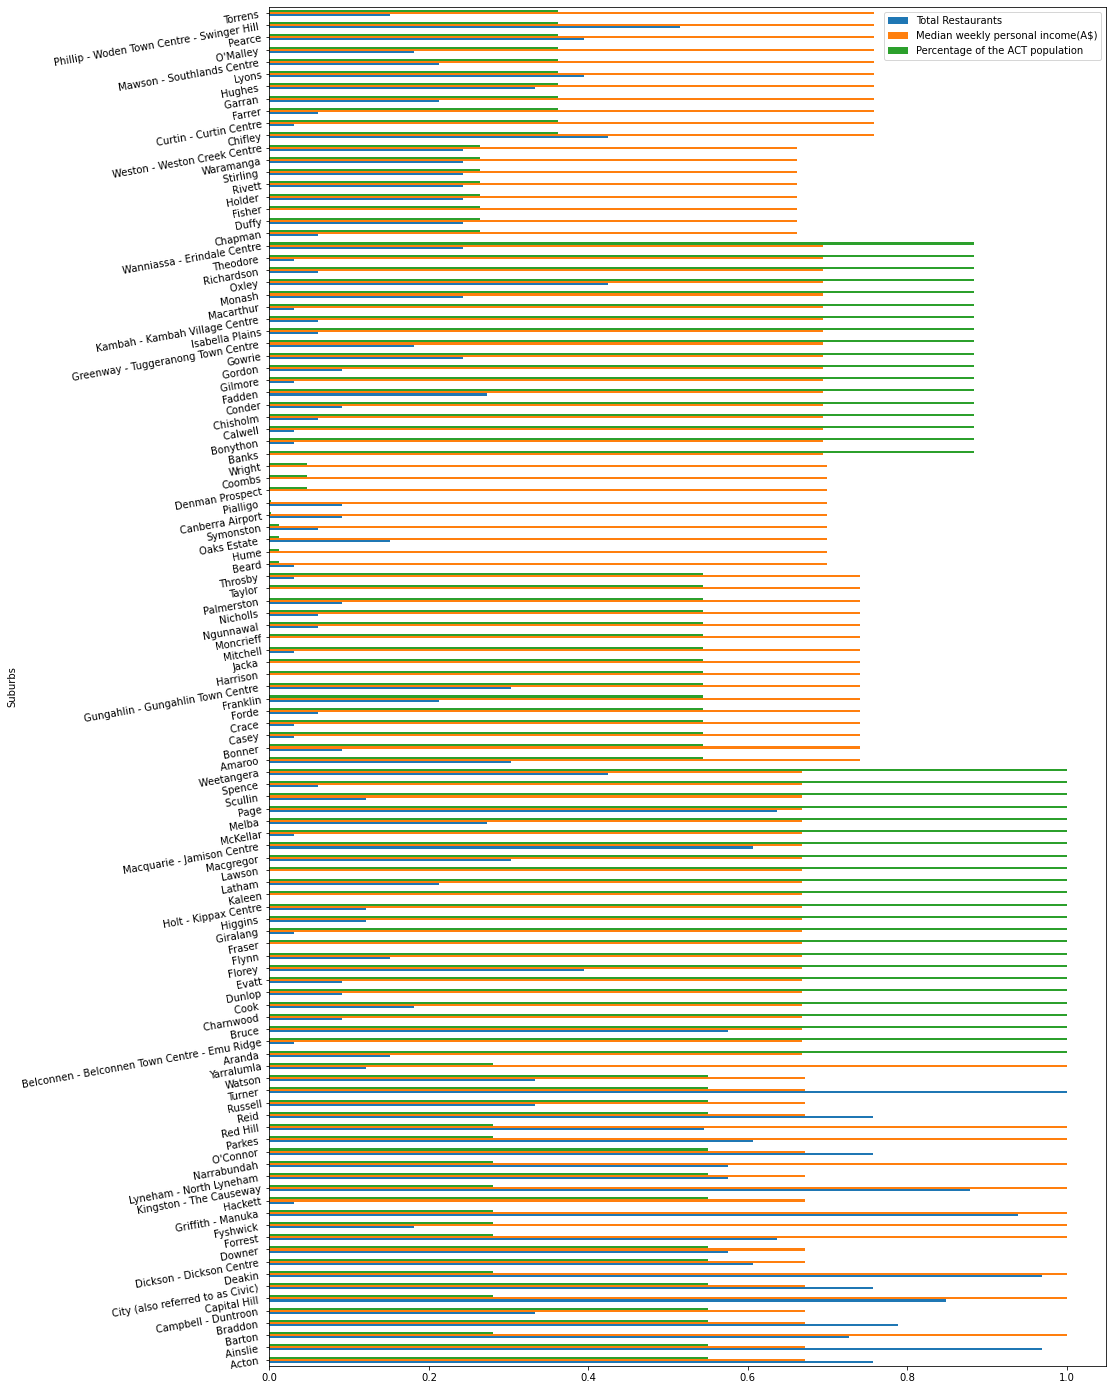

In [93]:
import matplotlib.pyplot as plt
df_max_scaled.plot(x="Suburbs", y=["Total Restaurants", "Median weekly personal income(A$)", "Percentage of the ACT population"], kind="barh", rot=10, fontsize=10,figsize=(15, 25))
plt.show()

In [94]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,sp in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Suburbs'], venues_merged['Cluster Labels'],venues_merged['Total Restaurants'],venues_merged["Median weekly personal income(A$)"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) +'\nMedian weekley incomeA$: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [95]:

# import Bokeh packages for interactive plots
!pip install bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.tile_providers import CARTODBPOSITRON_RETINA
from bokeh.palettes import Category20b, Category20c, Spectral
from bokeh.layouts import gridplot
from bokeh.tile_providers import get_provider, Vendors
get_provider('CARTODBPOSITRON')
output_notebook()

     |████████████████████████████████| 10.6MB 7.7MB/s eta 0:00:01
     |████████████████████████████████| 40kB 15.3MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/5c/69/cf/f2a313e4effcc72b47592d530607ecdb690b19487507a1e25f
Successfully built bokeh


Loading BokehJS ...

In [96]:
# define functions for coordinate projection
import math

def lgn2x(a):
    return a * (math.pi/180) * 6378137

def lat2y(a):
    return math.log(math.tan(a * (math.pi/180)/2 + math.pi/4)) * 6378137


In [97]:
# project coordinates
df_final['x'] = df_final.Longitude.apply(lambda row: lgn2x(row))
df_final['y'] = df_final.Latitude.apply(lambda row: lat2y(row))
# drop unused columns
df_final = df_final.drop(['Latitude', 'Longitude'], axis=1)
df_final.head()

,postcodes,districs,Suburbs,Median weekly personal income(A$),Percentage of the ACT population,Total Restaurants,x,y
0,2601,North Canberra,Acton,925,13.3,25,1.659990e+07,-4.201916e+06
1,2602,North Canberra,Ainslie,925,13.3,32,1.660266e+07,-4.199652e+06
2,2600,South Canberra,Barton,1376,6.8,24,1.660157e+07,-4.205789e+06
3,2612,North Canberra,Braddon,925,13.3,26,1.660170e+07,-4.200893e+06
4,2612,North Canberra,Campbell - Duntroon,925,13.3,11,1.660460e+07,-4.205162e+06


In [101]:

# drop duplicated restaurants and keep the most expensive one
r_map = (df_final.sort_values(['Total Restaurants'], ascending=[0])
             .drop_duplicates(subset=['Suburbs']))

# create ColumnDataSource
cds = ColumnDataSource(r_map)

# customize hover tool
hover = HoverTool(tooltips=[('districs', '@districs'),
                            ('Suburbs', '@Suburbs'),
                            ('Total Restaurants', '@Total Restaurants'),
                            ("Median weekly personal income(A$)", "@Median weekly personal income(A$)")],
                  mode='mouse')

# UPPER FIGURE
# initialize a figure
up = figure(title='Location of Restaurants in Canberra',
           plot_width=780, plot_height=360,
           x_axis_location=None, y_axis_location=None, 
           tools=['pan', 'wheel_zoom', 'tap', 'reset', 'crosshair', hover])

# overlap map
from bokeh.tile_providers import get_provider, Vendors 
get_provider(Vendors.CARTODBPOSITRON)
get_provider('CARTODBPOSITRON')

# create color mapper
mapper = CategoricalColorMapper(factors=r_map.districs.unique(), 
                                palette=Category20b[20]+Category20c[20]+Spectral[4])

# add restaurant location
scatter = up.circle('x', 'y', source=cds, size='dot_size',
                    color={'field': 'state','transform': mapper}, alpha=.5,
                    selection_color='black',
                    nonselection_fill_alpha=.1,
                    nonselection_fill_color='gray',)
                  

# BOTTOM FIGURE
# initialize a figure
down = figure(title='Number of Restaurants in each districts (Click bar below)',
              x_range=r_map.districs.unique(),
              plot_width=780, plot_height=200,
              tools=['tap', 'reset'])

# add restaurant counts
down.vbar(x='districs', top='Total Restaurants', source=cds, width=.7,
            color={'field': 'districs','transform': mapper},
            selection_color='black',
            nonselection_fill_alpha=.1,
            nonselection_fill_color='gray',)


# set graph properties
down.xgrid.grid_line_color = None
down.xaxis.major_label_orientation = 'vertical'
down.xaxis.axis_label = 'Districs'
down.yaxis.axis_label = 'Count'
p = gridplot([[up], [down]], toolbar_location='left',)

# show the plot
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "state", key "line_color" value "state", key "size" value "dot_size" [renderer: GlyphRenderer(id='1148', ...)]
